<a href="https://colab.research.google.com/github/jagsir346/Mini-Project-08-R-programming-assignment-/blob/main/Mini_Project_08_R_programming_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# R Assignment Solutions

## Q1. Create a file that contains 1000 lines of random strings.

In [ ]:
!pip install rpy2
%load_ext rpy2.ipython


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
set.seed(123)
random_strings <- replicate(1000, paste0(sample(letters, 10, replace = TRUE), collapse = ""))
writeLines(random_strings, "random_strings.txt")


## Q2.Create a random dataset of 100 rows and 30 columns. All the values are defined between [1, 200]. Perform the following operations:

Number of rows with NA: 100 
Selected columns with all correlations <= 0.7 (excluding self): 30 


Loading required package: pheatmap
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'http://cran.us.r-project.org/src/contrib/pheatmap_1.0.13.tar.gz'
Content type 'application/x-gzip' length 15162 bytes (14 KB)
downloaded 14 KB


The downloaded source packages are in
	‘/tmp/RtmpoREVVc/downloaded_packages’
In addition: Warning message:
In library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE,  :
  there is no package called ‘pheatmap’


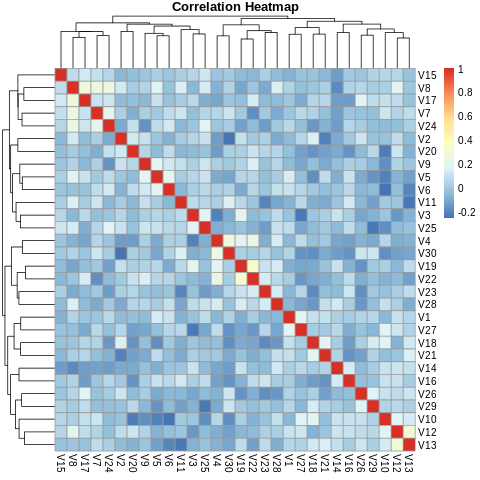

In [ ]:
%%R

# Load necessary library
if (!require("pheatmap")) install.packages("pheatmap", repos = "http://cran.us.r-project.org")
library(pheatmap)

# Create dataset
set.seed(42)
data <- matrix(sample(1:200, 100*30, replace = TRUE), nrow = 100)
df <- as.data.frame(data)

# (i) Replace values in [10, 60] with NA and count rows with NAdf[df >= 10 & df <= 60] <- NA
na_rows <- apply(df, 1, function(row) any(is.na(row)))
cat("Number of rows with NA:", sum(na_rows), "\n")

# (ii) Replace NA with column mean
df <- as.data.frame(lapply(df, function(col) {
    ifelse(is.na(col), mean(col, na.rm = TRUE), col)
}))

# (iii) Pearson correlation and heatmap for corr <= 0.7
corr_matrix <- cor(df)
pheatmap(corr_matrix, main = "Correlation Heatmap")

# Optional: Select columns where max(abs(correlation)) <= 0.7 (excluding self-correlation)
low_corr_cols <- which(apply(corr_matrix, 2, function(x) max(abs(x[-which.max(abs(x))])) <= 0.7))
selected_df <- df[, low_corr_cols]
cat("Selected columns with all correlations <= 0.7 (excluding self):", length(low_corr_cols), "\n")

# (iv) Normalize between 0 and 10
normalize <- function(x) (x - min(x)) / (max(x) - min(x)) * 10
df_norm <- as.data.frame(lapply(df, normalize))

# (v) Replace values with 1 if <=0.5 else 0
df_bin <- as.data.frame(lapply(df_norm, function(x) ifelse(x <= 0.5, 1, 0)))


##Q3.Create a random dataset of 500 rows and 10 columns.
###Columns 1 to 4 are defined between [-10, 10];
###Columns 5 to 8 are defined between [10, 20];
###Columns 9 to 10 are defined between [-100, 100].

Loading required package: factoextra
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘rbibutils’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘mvtnorm’, ‘numDeriv’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’

trying URL 'http://cran.us.r-project.org/src/contrib/rbibutils_2.3.tar.gz'
trying URL 'http://cran.us.r-project.org/src/contrib/Deriv_4.2.0.tar.gz'
trying URL 'http://cran.us.r-project.org/src/contrib/microbenchmark_1.5.0.tar.gz'
trying URL 'http://cran.us.r-project.org/src/contrib/Rdpack_2.6.4.tar.gz'
trying URL 'http://cran.us.r-project

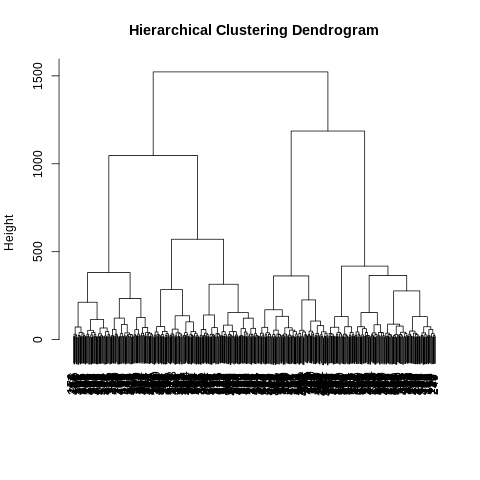

In [ ]:
%%R

# Load required libraries
if (!require("factoextra")) install.packages("factoextra", repos = "http://cran.us.r-project.org")
library(factoextra)

# Create base dataset
set.seed(101)
df_cluster <- data.frame(matrix(nrow = 500, ncol = 10))

# Assign specified ranges
df_cluster[, 1:4] <- matrix(runif(500*4, -10, 10), nrow = 500, ncol = 4)
df_cluster[, 5:8] <- matrix(runif(500*4, 10, 20), nrow = 500, ncol = 4)
df_cluster[, 9:10] <- matrix(runif(500*2, -100, 100), nrow = 500, ncol = 2)

# ---- K-Means Clustering ----

# Elbow method to determine optimal number of clusters
fviz_nbclust(df_cluster, kmeans, method = "wss") +
  labs(title = "K-Means - Elbow Method")

# Apply k-means with k=3
kmeans_result <- kmeans(df_cluster, centers = 3, nstart = 25)

# Visualize clustering
fviz_cluster(kmeans_result, data = df_cluster) +
  labs(title = "K-Means Cluster Plot")

# ---- Hierarchical Clustering ----

# Distance matrix and clustering
dist_mat <- dist(df_cluster)
hclust_result <- hclust(dist_mat, method = "ward.D2")

# Dendrogram plot
plot(hclust_result, main = "Hierarchical Clustering Dendrogram", xlab = "", sub = "")

#You have to wait for about 10 min for result


###Q4.Create a random dataset of 600 rows and 15 columns. All the values are defined between [-100, 100].
Perform the following operations:
(i) Plot scatter graph between Column 5 and Column 6.
(ii) Plot histogram of each column in a single graph.
(iii) Plot the box plot of each column in a single graph.

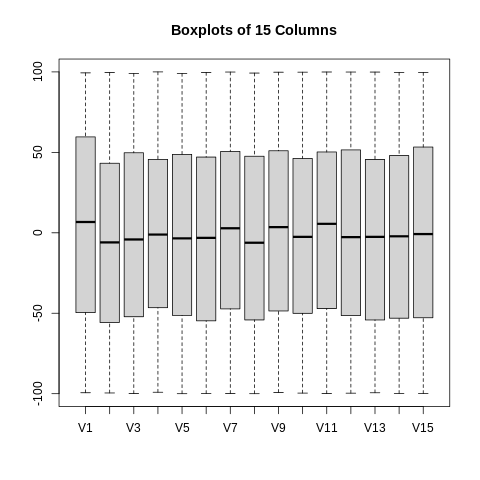

In [ ]:
# Q4. Plotting
%%R

set.seed(202)
df_plot <- as.data.frame(matrix(runif(600*15, -100, 100), nrow = 600))

# (i) Scatter between Col 5 and Col 6
plot(df_plot$V5, df_plot$V6, main="Scatter Plot", xlab="V5", ylab="V6")

# (ii) Histogram of each column
par(mfrow = c(3, 5))
for (i in 1:15) {
  hist(df_plot[[i]], main = paste("Hist of V", i), xlab = "", col = "skyblue")
}
par(mfrow = c(1, 1))

# (iii) Boxplot of each column
boxplot(df_plot, main = "Boxplots of 15 Columns")


##Q5.Create a random dataset of 500 rows and 5 columns. All the values are defined between [5, 10].
Perform the following operations:
(i) Perform t-Test on each column.
(ii) Perform Wilcoxon Signed Rank Test on each column.
(iii) Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4.

In [ ]:
# Q5. Statistical Tests
%%R

set.seed(303)
df_test <- as.data.frame(matrix(runif(500*5, 5, 10), nrow = 500))

# (i) t-Test on each column
sapply(df_test, function(x) t.test(x, mu = 7)$p.value)

# (ii) Wilcoxon Signed Rank Test
sapply(df_test, function(x) wilcox.test(x, mu = 7)$p.value)

# (iii) Two-sample t-Test and Wilcoxon Rank Sum Test on Col 3 and 4
t.test(df_test$V3, df_test$V4)
wilcox.test(df_test$V3, df_test$V4)



	Wilcoxon rank sum test with continuity correction

data:  df_test$V3 and df_test$V4
W = 133783, p-value = 0.05446
alternative hypothesis: true location shift is not equal to 0

